In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read data from file
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


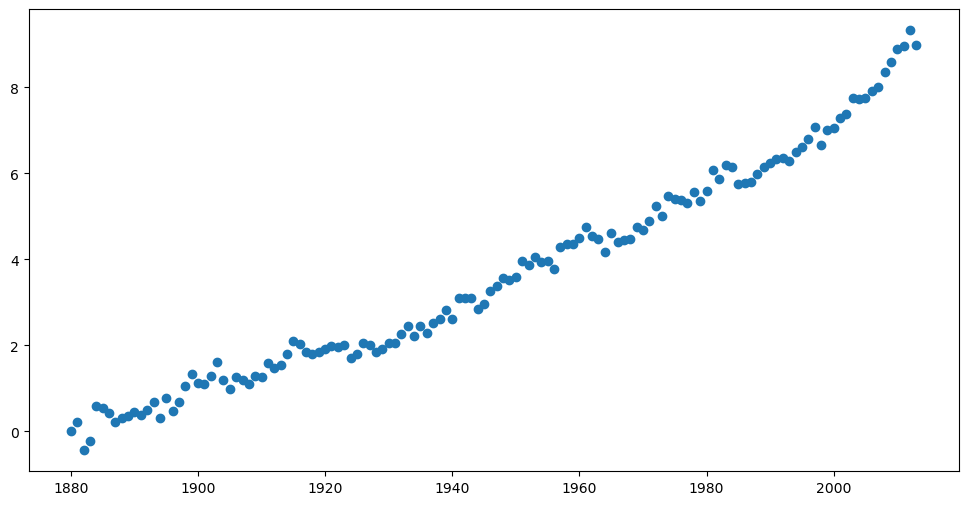

In [3]:
# Create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data=df, 
            x="Year", 
            y="CSIRO Adjusted Sea Level")

plt.show()

In [4]:
# Create first line of best fit

m = linregress(x=df["Year"], 
            y=df["CSIRO Adjusted Sea Level"])

m

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

In [5]:
trend = [m.slope * i + m.intercept for i in df["Year"]]

In [6]:
df["trend"] = trend

In [7]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,trend
0,1880,0.000000,-0.952756,0.952756,NaN,-0.542124
1,1881,0.220472,-0.732283,1.173228,NaN,-0.479079
2,1882,-0.440945,-1.346457,0.464567,NaN,-0.416035
3,1883,-0.232283,-1.129921,0.665354,NaN,-0.352990
4,1884,0.590551,-0.283465,1.464567,NaN,-0.289946


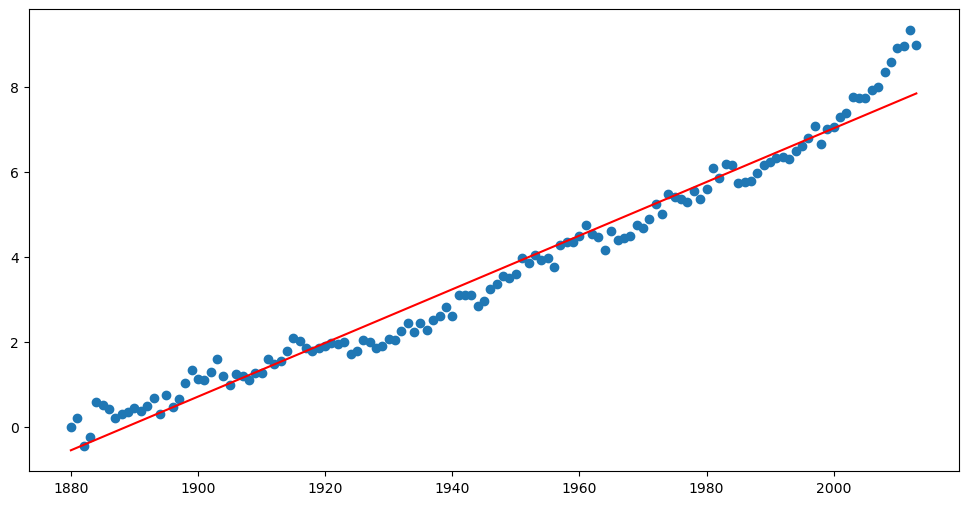

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(data=df, 
            x="Year", 
            y="CSIRO Adjusted Sea Level")
plt.plot(df["Year"], df["trend"], color="red")
plt.show()

# plt.plot(df["Year"], df["trend"])

In [9]:
years_extended = [i for i in range(2014, 2051)]

print(years_extended)

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]


In [10]:
trend_2050 = [m.slope * i + m.intercept for i in years_extended]

In [11]:
df_2050 = pd.DataFrame({"Year":years_extended, "trend":trend_2050})
df_2050.head()

,Year,trend
0,2014,7.905850
1,2015,7.968895
2,2016,8.031939
3,2017,8.094984
4,2018,8.158029


In [12]:
df_gabung = pd.concat([df, df_2050], ignore_index=True)
df_gabung

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,trend
0,1880,0.000000,-0.952756,0.952756,NaN,-0.542124
1,1881,0.220472,-0.732283,1.173228,NaN,-0.479079
2,1882,-0.440945,-1.346457,0.464567,NaN,-0.416035
3,1883,-0.232283,-1.129921,0.665354,NaN,-0.352990
4,1884,0.590551,-0.283465,1.464567,NaN,-0.289946
...,...,...,...,...,...,...
166,2046,NaN,NaN,NaN,NaN,9.923277
167,2047,NaN,NaN,NaN,NaN,9.986322
168,2048,NaN,NaN,NaN,NaN,10.049366
169,2049,NaN,NaN,NaN,NaN,10.112411


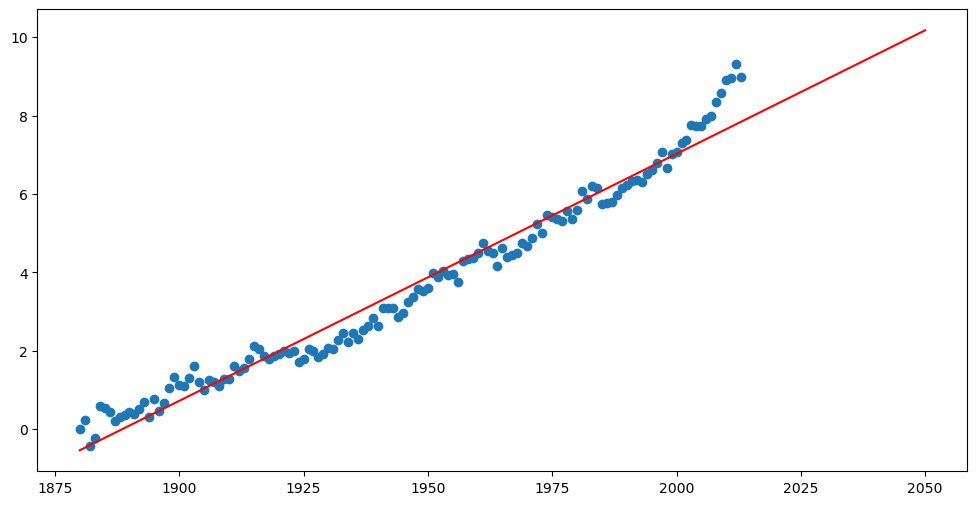

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(data=df, 
            x="Year", 
            y="CSIRO Adjusted Sea Level")
plt.plot(df_gabung["Year"], df_gabung["trend"], color="red")
plt.show()

In [14]:
df_2000 = df[(df["Year"] >= 2000)]
df_2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,trend
120,2000,7.062992,6.791339,7.334646,6.920582,7.023226
121,2001,7.287402,7.019685,7.555118,7.087460,7.086271
122,2002,7.381890,7.110236,7.653543,7.319698,7.149315
123,2003,7.759843,7.484252,8.035433,7.488353,7.212360
124,2004,7.740157,7.464567,8.015748,7.507933,7.275404
125,2005,7.744094,7.472441,8.015748,7.644563,7.338449
126,2006,7.917323,7.645669,8.188976,7.697420,7.401494
127,2007,7.996063,7.712598,8.279528,7.702147,7.464538
128,2008,8.350394,8.078740,8.622047,7.907365,7.527583
129,2009,8.586614,8.311024,8.862205,8.046354,7.590627


In [15]:
# create linregress from year 2000 up

m_2000 = linregress(df_2000["Year"], df_2000["CSIRO Adjusted Sea Level"])
m_2000

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

In [16]:
df_2000_2050 = df_gabung[df_gabung["Year"] >= 2000].copy(deep=True)
df_2000_2050

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,trend
120,2000,7.062992,6.791339,7.334646,6.920582,7.023226
121,2001,7.287402,7.019685,7.555118,7.087460,7.086271
122,2002,7.381890,7.110236,7.653543,7.319698,7.149315
123,2003,7.759843,7.484252,8.035433,7.488353,7.212360
124,2004,7.740157,7.464567,8.015748,7.507933,7.275404
125,2005,7.744094,7.472441,8.015748,7.644563,7.338449
126,2006,7.917323,7.645669,8.188976,7.697420,7.401494
127,2007,7.996063,7.712598,8.279528,7.702147,7.464538
128,2008,8.350394,8.078740,8.622047,7.907365,7.527583
129,2009,8.586614,8.311024,8.862205,8.046354,7.590627


In [17]:
# create trend line

trend_2000_2050 = [m_2000.slope * i + m_2000.intercept for i in df_2000_2050["Year"]]
# trend_2000_2050

In [18]:
df_2000_2050["trend_2000"] = trend_2000_2050

In [19]:
df_2000_2050.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,trend,trend_2000
120,2000,7.062992,6.791339,7.334646,6.920582,7.023226,7.061080
121,2001,7.287402,7.019685,7.555118,7.087460,7.086271,7.227507
122,2002,7.381890,7.110236,7.653543,7.319698,7.149315,7.393934
123,2003,7.759843,7.484252,8.035433,7.488353,7.212360,7.560362
124,2004,7.740157,7.464567,8.015748,7.507933,7.275404,7.726789


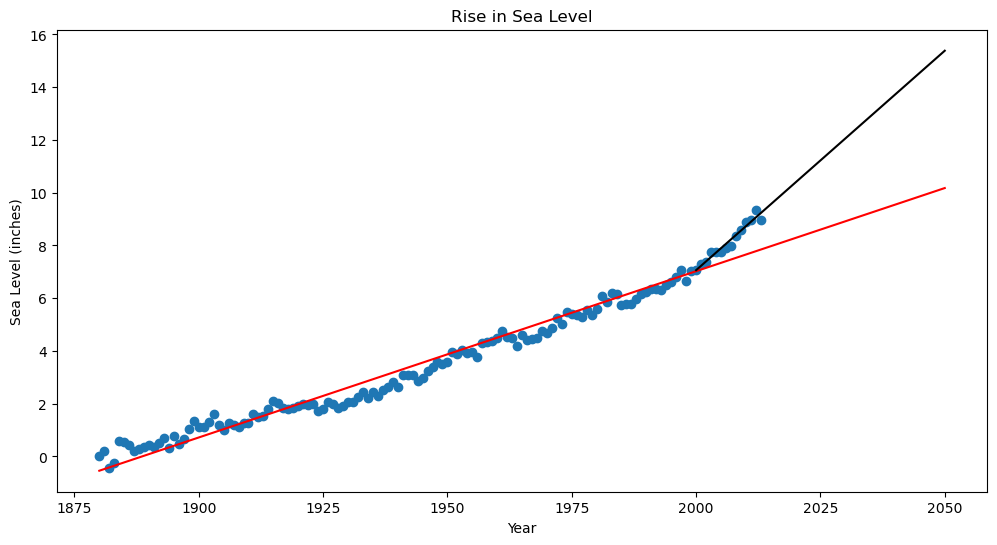

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(data=df, 
            x="Year", 
            y="CSIRO Adjusted Sea Level")

plt.plot(df_gabung["Year"], df_gabung["trend"], color="red")

plt.plot(df_2000_2050["Year"], df_2000_2050["trend_2000"], color="black")

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

plt.savefig('sea_level_plot.png')